# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('telecom_users.csv')
print('Количество не заполненных значений')
data.isna().sum()

Количество не заполненных значений


Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [2]:
data = pd.read_csv('telecom_users.csv')
dataset = pd.read_csv('telecom_users.csv')
data.loc[data['tenure']==0,'TotalCharges']=0
# data[data['tenure']>0]
data['TotalCharges'] = data['TotalCharges'].apply(float)
data['OldMonthlyCharges'] = data['TotalCharges']/data['tenure']
data.loc[data['TotalCharges']==0,'OldMonthlyCharges']=0

# Mapping tenure
data.loc[ data['tenure'] <= 18, 'tenure'] = 0
data.loc[(data['tenure'] > 18) & (data['tenure'] <= 36), 'tenure'] = 1
data.loc[(data['tenure'] > 36) & (data['tenure'] <= 54), 'tenure'] = 2
data.loc[ data['tenure'] > 54, 'tenure'] = 3

# Mapping OldMonthlyCharges
median_charge = data['OldMonthlyCharges'].median()
std_charge = data['OldMonthlyCharges'].std()

data.loc[ data['OldMonthlyCharges'] <= median_charge-std_charge, 'OldMonthlyCharges'] = 0
data.loc[(data['OldMonthlyCharges'] > median_charge-std_charge) & (data['OldMonthlyCharges'] <= median_charge), 'OldMonthlyCharges'] = 1
data.loc[(data['OldMonthlyCharges'] > median_charge) & (data['OldMonthlyCharges'] <= median_charge+std_charge), 'OldMonthlyCharges'] = 2
data.loc[ data['OldMonthlyCharges'] > median_charge+std_charge, 'OldMonthlyCharges'] = 3


# Mapping gender
data['gender'] = data['gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

# Mapping boolean
# Чтобы использовать точнось вместо полноты, поменяем значения - ушел будет 0, остался - 1.
data['Churn'] = data['Churn'].map( {'No': 1, 'Yes': 0} ).astype(int)
data['Partner'] = data['Partner'].map( {'No': 0, 'Yes': 1} ).astype(int)
data['Dependents'] = data['Dependents'].map( {'No': 0, 'Yes': 1} ).astype(int)
data['PhoneService'] = data['PhoneService'].map( {'No': 0, 'Yes': 1} ).astype(int)
data['PaperlessBilling'] = data['PaperlessBilling'].map( {'No': 0, 'Yes': 1} ).astype(int)


# Разнесем информацию о наличии интернета и о типе оборудования по разным колонкам
data['InternetType'] = data['InternetService'].map( {'No': 0, 'Fiber optic': 2, 'DSL': 1} ).astype(int)
data['InternetService'] = (data['InternetService']!= 'No')+0

# Информация о наличии или отсутствии услуг есть в другой колонке, отсюда можно удалить
data['MultipleLines'] = data['MultipleLines'].map( {'No': 0, 'No phone service':0, 'Yes': 1} ).astype(int)
data['OnlineSecurity'] = data['OnlineSecurity'].map( {'No internet service' : 0, 'No': 0, 'Yes': 1} ).astype(int)
data['OnlineBackup'] = data['OnlineBackup'].map( {'No internet service' : 0, 'No': 0, 'Yes': 1} ).astype(int)
data['DeviceProtection'] = data['DeviceProtection'].map( {'No internet service' : 0, 'No': 0, 'Yes': 1} ).astype(int)
data['TechSupport'] = data['TechSupport'].map( {'No internet service' : 0, 'No': 0, 'Yes': 1} ).astype(int)
data['StreamingTV'] = data['StreamingTV'].map( {'No internet service' : 0, 'No': 0, 'Yes': 1} ).astype(int)
data['StreamingMovies'] = data['StreamingMovies'].map( {'No internet service' : 0, 'No': 0, 'Yes': 1} ).astype(int)


# Добавим признак длительного контракта
data['LongContract'] = data['Contract'].map( {'Month-to-month' : 0, 'One year': 1, 'Two year': 1} ).astype(int)
data['Contract'] = data['Contract'].map( {'Month-to-month' : 0, 'One year': 1, 'Two year': 2} ).astype(int)
data['PaymentMethod'] = data['PaymentMethod'].map( 
    {'Mailed check' : 0, 'Electronic check': 1, 'Bank transfer (automatic)': 2,'Credit card (automatic)':3} 
    ).astype(int)


# Уберем лишние данные
train = data.drop(['Unnamed: 0', 'customerID', 'TotalCharges','MonthlyCharges','Contract'],axis = 1)
targets = data['Churn']
train.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Churn,OldMonthlyCharges,InternetType,LongContract
0,1,0,1,1,3,1,1,0,0,0,0,0,0,0,0,3,1,0.0,0,1
1,0,0,0,0,2,1,0,1,0,1,1,0,1,0,1,3,1,2.0,2,0
2,0,1,1,0,2,1,1,1,0,0,0,0,0,0,1,2,0,2.0,2,0
3,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,1.0,1,0
4,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,1,1.0,1,0
5,0,0,1,0,3,0,0,1,1,0,1,1,0,1,1,2,1,1.0,1,1
6,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,2.0,2,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.0,1,0
8,1,0,0,0,2,0,0,1,0,0,1,1,0,0,0,0,1,0.0,1,1
9,1,1,0,0,3,1,1,1,1,1,1,1,1,1,1,1,1,3.0,2,0


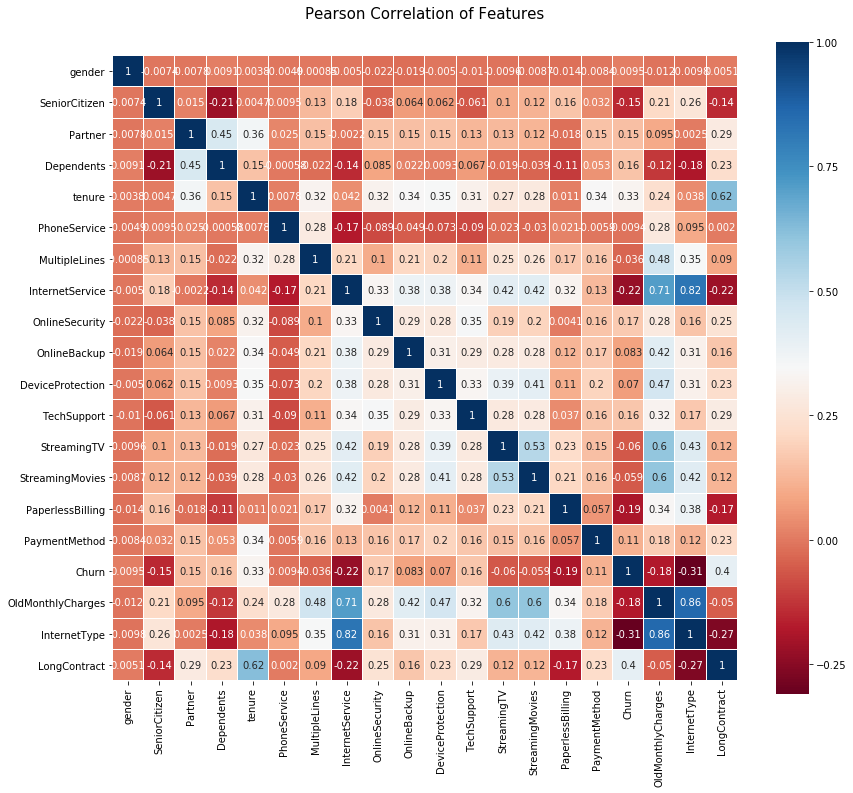

In [3]:
# Feature selection
# drop_elements = ['Unnamed: 0', 'customerID']
# train = train.drop(drop_elements, axis = 1)

# data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
    

# data.loc[data['TotalCharges']==0]
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# 2. Исследование зависимостей и формулирование гипотез

In [4]:
# Видно связь между типом интернета и ежемесячным платежом - DSL стоит дешевле, чем Fiber optic, тут все понятно.
# Есть зависимость между подключенными услугами и размером ежемесячного платежа, но это и так понятно.
# Так же видно, что чем дольше человек является клиентом, тем болше вероятность заключения долгосрочного контракта
print(data[['tenure','LongContract']].groupby('LongContract').mean())
print('Для долгосрочного контракта среднее время сотрудничества в 3,5 раза выше.')
# Видно, что люди, которые подключают StreamingTV обычно подключают и StreamingMovies
print(data[['StreamingTV','StreamingMovies']].groupby(['StreamingMovies']).sum())
print('У 1660 клиентов с StreamingMovies так же подключен и StreamingTV, а у 646 - только StreamingTV')

                tenure
LongContract          
0             0.605384
1             2.139492
Для долгосрочного контракта среднее время сотрудничества в 3,5 раза выше.
                 StreamingTV
StreamingMovies             
0                        646
1                       1660
У 1660 клиентов с StreamingMovies так же подключен и StreamingTV, а у 646 - только StreamingTV


Явных зависимостей оттока клиентов от определенной фичи не видно. Есть некоторая зависимость 
от того, заключен длительный контракт или нет. 

In [5]:
print('Всего клиентов:')
print(data[['Churn','LongContract']].groupby(['LongContract']).count())
print('Ушли:')
print(data[data['Churn']==0][['Churn','LongContract']].groupby(['LongContract']).count())
print('Из 2717 клиентов с длительным контрактом ушли лишь 189 человек.')
train = train.drop(['Churn'],axis = 1)

Всего клиентов:
              Churn
LongContract       
0              3269
1              2717
Ушли:
              Churn
LongContract       
0              1398
1               189
Из 2717 клиентов с длительным контрактом ушли лишь 189 человек.


# 3. Построение моделей для прогнозирования оттока

Возьмем несколько методов, которые подходят для рещения таких задач, чтобы попробовать использовать стакинг.

In [6]:
### YOUR CODE HERE ###
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score



# параметры базовых алгоритмов
rfc_params = {'n_estimators': range(40, 60, 1), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}

svc_params = {'kernel': ['linear', 'rbf'], # SVC
              'C': np.arange(0.1, 0.2, 0.01)}

gbc_params = {'learning_rate': np.arange(0.01, 0.1, 0.01)} # GradientBoostingClassifier

lr_params = {'C': np.arange(1, 2, 0.1),
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

dtc_params = {'max_depth':np.arange(1,5,1)}

skf = StratifiedKFold(n_splits=5, random_state=17)

x_train, x_test, y_train, y_test = train_test_split(train, 
                                                    targets,
                                                    test_size=0.3,
                                                    random_state=17)

rfc = RandomForestClassifier(random_state=17)
svc = SVC(random_state=17,gamma='scale')
gbc = GradientBoostingClassifier(random_state=17)
lr = LogisticRegression(random_state=17)
dtc = DecisionTreeClassifier(random_state=17)
nb = GaussianNB()

models = []
models.append(rfc)
models.append(svc)
models.append(gbc)
models.append(lr)
models.append(dtc)
models.append(nb)


C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Найдем лучшие мета-параметры

In [7]:
def MyGridSearch(model,model_params={}):
#     recall_score
    clf = GridSearchCV(model, model_params,cv=skf,scoring = 'precision')
#     clf = GridSearchCV(model, model_params,cv=skf,scoring = 'recall')
    clf.fit(x_train, y_train)

    pred = clf.predict(x_test)
    print(clf.best_estimator_)
    print('recall_score',recall_score(y_test,pred))
    print('precision_score',precision_score(y_test,pred))
    print('mean_squared_error',clf.score(x_test,y_test))
    return clf.predict(x_train),pred,clf.best_params_

pred_rfc,test_pred_rfc,rfc_best_params = MyGridSearch(rfc,rfc_params)
pred_svc,test_pred_svc,svc_best_params = MyGridSearch(svc,svc_params)
pred_gbc,test_pred_gbc,gbc_best_params = MyGridSearch(gbc,gbc_params)
pred_lr,test_pred_lr,lr_best_params = MyGridSearch(lr,lr_params)
pred_dtc,test_pred_dtc,dtc_best_params = MyGridSearch(dtc,dtc_params)
pred_nb,test_pred_nb,nb_best_params = MyGridSearch(nb)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=None,
            oob_score=False, random_state=17, verbose=0, warm_start=False)
recall_score 0.9069069069069069
precision_score 0.8200950441276307
mean_squared_error 0.8200950441276307
SVC(C=0.11, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=17, shrinking=True,
  tol=0.001, verbose=False)
recall_score 0.8836336336336337
precision_score 0.8383190883190883
mean_squared_error 0.8383190883190883
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.08, loss='deviance', max_depth=3,
              max_featur

В качестве мета-алгоритма используем XGBoost. Для него тоже поищем лучшие параметры

In [8]:
xgb_params = {'n_estimators': range(30, 50, 1),
#               'eta': np.arange(0.1, .3, .1),
              'min_child_weight': range(2, 6, 1),
              'subsample': np.arange(0.3, 1., 0.1),
              'eval_metric' : ['map']}

meta = XGBClassifier(n_estimators=40,random_state=17)

meta_mtrx = np.empty((x_train.shape[0], len(models))) 
meta_mtrx[:, 0] = pred_rfc
meta_mtrx[:, 1] = pred_svc
meta_mtrx[:, 2] = pred_gbc
meta_mtrx[:, 3] = pred_lr
meta_mtrx[:, 4] = pred_dtc
meta_mtrx[:, 5] = pred_nb

clf = GridSearchCV(meta, xgb_params,cv=5,scoring = 'precision')
# clf = GridSearchCV(meta, xgb_params,cv=5,scoring = 'recall')
clf.fit(meta_mtrx, y_train)


#    теперь тестим
meta_mtrx_test = np.empty((x_test.shape[0], len(models))) 
meta_mtrx_test[:, 0] = test_pred_rfc
meta_mtrx_test[:, 1] = test_pred_svc
meta_mtrx_test[:, 2] = test_pred_gbc
meta_mtrx_test[:, 3] = test_pred_lr
meta_mtrx_test[:, 4] = test_pred_dtc
meta_mtrx_test[:, 5] = test_pred_nb

pred = clf.predict(meta_mtrx_test)
print(clf.best_estimator_)

print('precision_score',precision_score(y_test,pred))
print('recall_score',recall_score(y_test,pred))
print('mean_squared_error',clf.score(meta_mtrx_test,y_test))


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eval_metric='map', gamma=0,
       gpu_id=-1, importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=2, missing=nan, monotone_constraints='()',
       n_estimators=30, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=17, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.3,
       tree_method='exact', validate_parameters=1, verbosity=None)
precision_score 0.8200950441276307
recall_score 0.9069069069069069
mean_squared_error 0.8200950441276307


Парметры выбраны, теперь посмотрим, что получилось.

In [9]:
from sklearn.metrics import confusion_matrix
def stacking(models, meta_alg, meta_alg_eval_metric, data_train, targets_train, data_test, targets_test=None, random_state=None, test_size=None, cv=5):
    if test_size is None:
        pass
    
    elif test_size > 0 and test_size < 1:
        pass
    
    else:
        raise ValueError("test_size must be between 0 and 1")
    
    meta_mtrx = np.empty((data_train.shape[0], len(models))) 

    for n, model in enumerate(models):
        meta_mtrx[:, n] = cross_val_predict(model,data_train,targets_train,cv=cv, method='predict')
        model.fit(data_train,targets_train)
        if not targets_test is None:
            print(model)
            predicted = model.predict(data_test)
            print(f'{n} recall_score: {recall_score(targets_test, predicted)}')
            print(f'{n} precision_score: {precision_score(targets_test, predicted)}')
            print(confusion_matrix(targets_test,predicted))

    meta_model = meta_alg.fit(meta_mtrx, targets_train,eval_metric=meta_alg_eval_metric)
    
    
#    теперь тестим
    meta_mtrx_test = np.empty((data_test.shape[0], len(models))) 

    for n, model in enumerate(models):
        meta_mtrx_test[:, n] = model.predict(data_test)

    meta_predict = meta_model.predict(meta_mtrx_test)
    
    if not targets_test is None:
        print(f'Stacking recall_score: {recall_score(targets_test, meta_predict)}')
        print(f'Stacking precision_score: {precision_score(targets_test, meta_predict)}')
        print('Stacking confusion_matrix')
        print(confusion_matrix(targets_test, meta_predict))
    return meta_predict
    
meta = XGBClassifier(**clf.best_params_)

rfc = RandomForestClassifier(random_state=17,**rfc_best_params)
svc = SVC(random_state=17,**svc_best_params)
gbc = GradientBoostingClassifier(random_state=17,**gbc_best_params)
lr = LogisticRegression(random_state=17,**lr_best_params)
dtc = DecisionTreeClassifier(random_state=17,**dtc_best_params)
nb = GaussianNB(**nb_best_params)

models = []
models.append(rfc)
models.append(svc)
models.append(gbc)
models.append(lr)
models.append(dtc)
models.append(nb)

predictions = stacking(models, meta, 'map', x_train, y_train, x_test, y_test, random_state=17, test_size=0.5, cv=5)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=None,
            oob_score=False, random_state=17, verbose=0, warm_start=False)
0 recall_score: 0.9069069069069069
0 precision_score: 0.8200950441276307
[[ 199  265]
 [ 124 1208]]
SVC(C=0.11, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=17,
  shrinking=True, tol=0.001, verbose=False)
1 recall_score: 0.8836336336336337
1 precision_score: 0.8383190883190883
[[ 237  227]
 [ 155 1177]]
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.08, loss='deviance', max_depth=3,
              max_featur

Ответы модели будут такие: ушел - 0, остался - 1.
Для решения задачи нас больще всего интересует количество ложно-положительных ответов 
(предсказали, что останется, а он ушел), соответственно будем использовать метрику precision.

Видно, что стакинг дал по метрике не такой хороший результат, как GaussianNB.
Сохраним отдельно модель, а так же попробуем скалировать данные.

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)

predictions_nb0 = nb.predict(x_test)
nb_predictions = nb.predict(x_test)
print(confusion_matrix(y_test,nb_predictions))
print(f'naive_bayes recall_score: {recall_score(y_test, nb_predictions)}')
print(f'naive_bayes precision_score: {precision_score(y_test, nb_predictions)}')


print('Попробуем скалировать:')
std_clf = make_pipeline(StandardScaler(), GaussianNB())
std_clf.fit(x_train, y_train)
pred_test_std = std_clf.predict(x_test)
print(confusion_matrix(y_test,pred_test_std))
print(f'scaled naive_bayes recall_score: {recall_score(y_test, pred_test_std)}')
print(f'scaled naive_bayes precision_score: {precision_score(y_test, pred_test_std)}')

[[ 320  144]
 [ 308 1024]]
naive_bayes recall_score: 0.7687687687687688
naive_bayes precision_score: 0.8767123287671232
Попробуем скалировать:
[[ 320  144]
 [ 308 1024]]
scaled naive_bayes recall_score: 0.7687687687687688
scaled naive_bayes precision_score: 0.8767123287671232


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


От скалирования толку нет - не будем его использовать.
Naive bayes дает хорошие результаты по ложно-положительным ответам, но при этом плохую по ложно-отрицательным, что тоже имеет значение, т.к. ложно-отрицательные это дополнительные расходы на тех клиентов, котрые и не собирались уходить.
Попробуем сделать следующее - возьмем от naive bayes только ту часть примеров, которая дала положительный, а остальные прогоним через стакинг.

In [11]:
d = {'nb': nb_predictions, 'meta': predictions}
df = pd.DataFrame(data=d)
df['Final_pred'] = df.apply(lambda x: 1 if x['nb']==1 else x['meta'], axis=1)

print('test',confusion_matrix(y_test,df['Final_pred']))
print('NB',confusion_matrix(y_test,nb_predictions))
print('Stacking',confusion_matrix(y_test,predictions))


test [[ 212  252]
 [ 123 1209]]
NB [[ 320  144]
 [ 308 1024]]
Stacking [[ 212  252]
 [ 123 1209]]


Неожиданный результат - ничего не изменилось. :)
Но мы не сдаемся - попробуем разделить датасет на две части и заново обучить избранные модели.
Избираем не просто так - выберем ту модель, которая лучше всего делает то, что плохо сделал naive bayes. Это логистическая регрессия.
Так же переучим стакинг, т.к. он более устойчив к новым данным.
Плюс сделаем свою метрику оценки моделей, т.к. нам нужно еще учитывать неизвестный на данный момент показатель о той цене, которую надо будет заплатить на удержание клиента. Будем считать, что это будет скидка на улсуги в процентах от медианного дохода от одного клиента (можно придумать более сложную модель, например считать расходы на менеджеров, скидку делать от фактически уплачиваемых клиентом денег и т.д., но это отдельная задача). Будем брать скидку от 0 до 100% и оценивать эффективность модели исходя из расчетной прибыли за следующие 6 месяцев.
Так же учтем, что даже при всех наших усилиях, 30% клиентов всё равно уйдет.

# 4. Сравнение качества моделей 

In [12]:
def print_confusion_matrix(confusion_matrix,heading):
    print(heading)
    print(confusion_matrix)
    print(confusion_matrix[0][0],'уйдет - ушёл')
    print(confusion_matrix[0][1],'останется, а он ушел')
    print(confusion_matrix[1][0],'уйдет, а он остался')
    print(confusion_matrix[1][1],'останется - остался')
    print(confusion_matrix[0][0]+confusion_matrix[1][0],'предсказывали,',confusion_matrix[0][1],'ушли')

def profit_forecast(cm,median_charge,return_cost):
    profit = (-(cm[1][0])*median_charge*return_cost*6# те, кто и так бы не ушел, а теперь у него скидка
            +(cm[0][0])*median_charge*(1-return_cost)*0.7*6)#остались не все и приносят на return_cost меньше, т.к. у них скидка
#     print(heading,return_cost,'итоговая прибыль за следующие 6 месяцев:',profit)
    return(profit)
          
# разделим датасет по предсказаниям NB
nb_predictions_train = nb.predict(x_train)
x_train_nb0 = x_train[nb_predictions_train==0]
y_train_nb0 = y_train[nb_predictions_train==0]

# обучим на новых данных лр
lr.fit(x_train_nb0,y_train_nb0)
predictions_nb0 = lr.predict(x_test)

d = {'nb': nb_predictions, 'lr': predictions_nb0}
df = pd.DataFrame(data=d)

df['Final_pred'] = df.apply(lambda x: 1 if x['nb']==1 else x['lr'], axis=1)
# сохраним предсказания для сравнения
predictions_nb_lr = df['Final_pred']

# теперь то же самое для стакинга
predictions_nb0_stacking = stacking(models, meta, 'auc', x_train_nb0, y_train_nb0, x_test, random_state=17, test_size=0.5, cv=5)

d = {'nb': nb_predictions, 'meta': predictions_nb0_stacking}
df = pd.DataFrame(data=d)

df['Final_pred'] = df.apply(lambda x: 1 if x['nb']==1 else x['meta'], axis=1)
Final_pred = df['Final_pred']

cm_Stacking = confusion_matrix(y_test,predictions)
cm_nb_lr = confusion_matrix(y_test,predictions_nb_lr)
cm_NB_Stacking = confusion_matrix(y_test,Final_pred)
cm_naive_bayes = confusion_matrix(y_test,nb_predictions)

print_confusion_matrix(cm_Stacking,'Stacking')
print_confusion_matrix(cm_nb_lr,'NB+svc')
print_confusion_matrix(cm_NB_Stacking,'NB+Stacking')
print_confusion_matrix(cm_naive_bayes,'naive_bayes')


# все тесты соберем в одну таблицу
graph = pd.DataFrame(columns = ['return_cost','Stacking','NB_lr','NB_Stacking','naive_bayes'])
for return_cost in np.arange(0,1.1,0.1):
    graph = graph.append(
        pd.DataFrame({'return_cost':[return_cost],
                 'Stacking':[profit_forecast(cm_Stacking,median_charge,return_cost)],
                 'NB_lr':[profit_forecast(cm_nb_lr,median_charge,return_cost)],
                 'NB_Stacking':[profit_forecast(cm_NB_Stacking,median_charge,return_cost)],
                 'naive_bayes':[profit_forecast(cm_naive_bayes,median_charge,return_cost)]
          }),ignore_index=True)


Stacking
[[ 212  252]
 [ 123 1209]]
212 уйдет - ушёл
252 останется, а он ушел
123 уйдет, а он остался
1209 останется - остался
335 предсказывали, 252 ушли
NB+svc
[[ 239  225]
 [ 144 1188]]
239 уйдет - ушёл
225 останется, а он ушел
144 уйдет, а он остался
1188 останется - остался
383 предсказывали, 225 ушли
NB+Stacking
[[ 207  257]
 [ 122 1210]]
207 уйдет - ушёл
257 останется, а он ушел
122 уйдет, а он остался
1210 останется - остался
329 предсказывали, 257 ушли
naive_bayes
[[ 320  144]
 [ 308 1024]]
320 уйдет - ушёл
144 останется, а он ушел
308 уйдет, а он остался
1024 останется - остался
628 предсказывали, 144 ушли


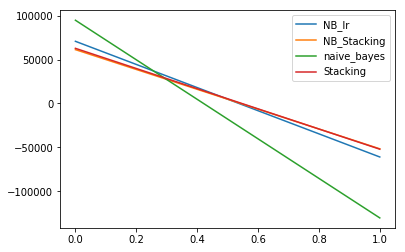

In [13]:
plt.plot(graph['return_cost'],graph['NB_lr'])
plt.plot(graph['return_cost'],graph['NB_Stacking'])
plt.plot(graph['return_cost'],graph['naive_bayes'])
plt.plot(graph['return_cost'],graph['Stacking'])
plt.legend(loc=1)
plt.show()

In [14]:
graph

,return_cost,Stacking,NB_lr,NB_Stacking,naive_bayes
0,0.0,62728.680,70717.710,61249.230,94684.80
1,0.1,51256.602,57559.059,49967.367,72197.16
2,0.2,39784.524,44400.408,38685.504,49709.52
3,0.3,28312.446,31241.757,27403.641,27221.88
4,0.4,16840.368,18083.106,16121.778,4734.24
5,0.5,5368.290,4924.455,4839.915,-17753.40
6,0.6,-6103.788,-8234.196,-6441.948,-40241.04
7,0.7,-17575.866,-21392.847,-17723.811,-62728.68
8,0.8,-29047.944,-34551.498,-29005.674,-85216.32
9,0.9,-40520.022,-47710.149,-40287.537,-107703.96


По графикам видим, что при пересчете получаем следующие результаты:
1. Объединение двух моделей не дает большого прироста в сравнинии со стакингом (но минимальный прирост всё равно присутствует, что видно по таблице).
2. Naive_bayes дает превосходные результаты при стоимости возврата клиента до примерно 30% от средней выручки.
3. При стоимости возврата клиента от 30 до 55% выгоднее испоьзовать модель NB_lr или NB_Stacking/Stacking(более надежная).
4. При стоимости возврата клиента более 55% выгоднее ничего не делать, т.к. затраты на возврат клиента превышают доход от их возвращения.
В таблице можно увидеть расчетную прибыль от наших действий за следующие 6 месяцев в сравнии с тем, если бы мы ничего не делали и позволили клиентам уходить.